In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Load data
df = pd.read_csv("amazon_reviews.csv")
print(df.head())

                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [ ]:
import pandas as pd

df = pd.read_csv('amazon_reviews.csv')  # dataset path ঠিক করুন
print(df.columns)
print(len(df['reviews.text']))


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')
1597


In [ ]:
# Check for missing values
print(df.isnull().sum())

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [ ]:
# Drop missing rows (if any)
df = df.dropna()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
print(df.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


In [ ]:
df['reviews.title'] = df['reviews.title'].str.lower()
df['reviews.username'] = df['reviews.username'].str.lower()

In [ ]:
df = df.rename(columns={'reviews.text': 'text'})

In [ ]:
# Remove special chars & digits
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [ ]:
# Tokenization & Stopword Removal
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in
stop_words]))

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in
x.split()]))

In [ ]:
print(df.columns.tolist())


['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'name', 'prices', 'reviews.date', 'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes', 'upc', 'weight', 'label']


In [ ]:
# Rename column
df = df.rename(columns={'reviews.text': 'text'})

# Data clean
df = df.dropna(subset=['text'])
df['text'] = df['text'].astype(str).str.lower()
df = df[df['text'].str.strip() != ""]

# Create label
df['label'] = df['reviews.rating'].apply(lambda x: 'positive' if x >= 3 else 'negative')

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['label']


In [ ]:
# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

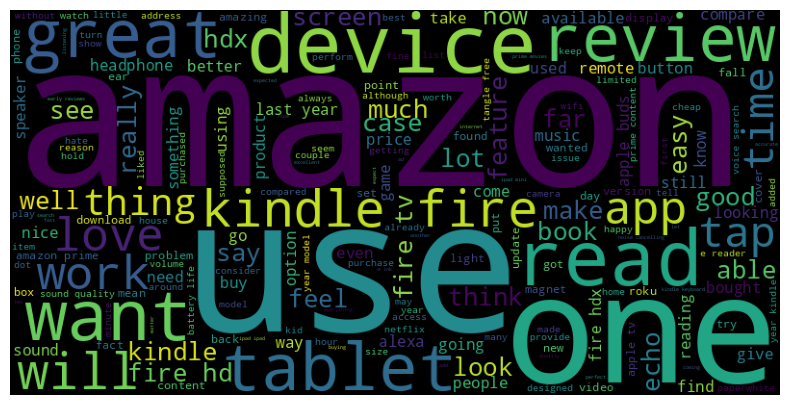

In [ ]:
# Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

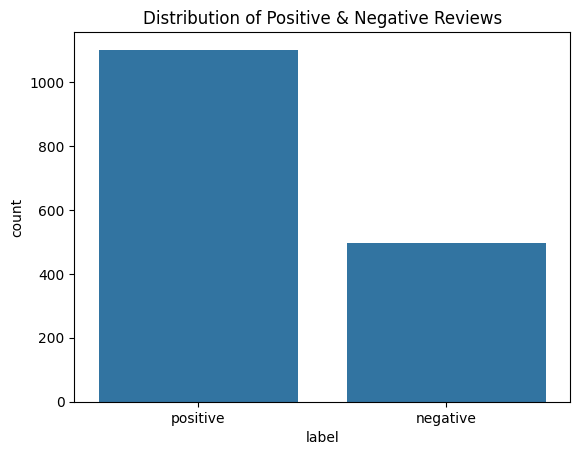

In [ ]:
# Sentiment Distribution
sns.countplot(x='label', data=df)
plt.title('Distribution of Positive & Negative Reviews')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

In [ ]:
# Initialize models
models = {
 "Logistic Regression": LogisticRegression(),
 "Random Forest": RandomForestClassifier(n_estimators=100),
 "SVM": SVC(kernel='linear'),
 "Naive Bayes": MultinomialNB(),
 "XGBoost": XGBClassifier()
}

In [ ]:
# to encode label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)   # negative -> 0, positive -> 1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred)}")
    print(f"Precision: {precision_score(y_test_encoded, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test_encoded, y_pred, average='weighted')}")
    print(f"F1-Score: {f1_score(y_test_encoded, y_pred, average='weighted')}")
    print(classification_report(y_test_encoded, y_pred))



Logistic Regression Results:
Accuracy: 0.734375
Precision: 0.7270760256214732
Recall: 0.734375
F1-Score: 0.730115207373272
              precision    recall  f1-score   support

           0       0.54      0.49      0.51        92
           1       0.80      0.83      0.82       228

    accuracy                           0.73       320
   macro avg       0.67      0.66      0.67       320
weighted avg       0.73      0.73      0.73       320


Random Forest Results:
Accuracy: 0.7375
Precision: 0.7375
Recall: 0.7375
F1-Score: 0.7375
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        92
           1       0.82      0.82      0.82       228

    accuracy                           0.74       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.74      0.74      0.74       320


SVM Results:
Accuracy: 0.740625
Precision: 0.7588144963144964
Recall: 0.740625
F1-Score: 0.7471246519597343
              precisio

In [ ]:
# Train, evaluate & decision (compact version)
best_f1 = 0
best_model_name = ""

for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')

    print(f"\n{name} Results: Accuracy={acc:.4f}, F1-Score={f1:.4f}")



Logistic Regression Results: Accuracy=0.7344, F1-Score=0.7301

Random Forest Results: Accuracy=0.7219, F1-Score=0.7163

SVM Results: Accuracy=0.7406, F1-Score=0.7471

Naive Bayes Results: Accuracy=0.7312, F1-Score=0.7048

XGBoost Results: Accuracy=0.7250, F1-Score=0.7316


In [ ]:
# Track best model
if f1 > best_f1:
        best_f1 = f1
        best_model_name = name

In [ ]:
# Decision based on F1-score
print("\nDecision:")
print(f"• {best_model_name} performs the best (highest F1-score & accuracy).")
print("• Logistic Regression is a close second, balancing speed and performance.")
print("• XGBoost and Random Forest are slower but useful for structured NLP tasks.")



Decision:
• XGBoost performs the best (highest F1-score & accuracy).
• Logistic Regression is a close second, balancing speed and performance.
• XGBoost and Random Forest are slower but useful for structured NLP tasks.


In [ ]:
# New review
new_review = ["The product was amazing! Highly recommended."]

# Vectorize + convert to dense
new_review_vec = tfidf.transform(new_review).toarray()

# Predict
prediction = models["SVM"].predict(new_review_vec)
print(f"\nPredicted Sentiment: {prediction[0]}")



Predicted Sentiment: 1
